In [84]:
import re
import pickle
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yong_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yong_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [85]:
# Load the data from tweets.json
df = pd.read_json('tweets.json', lines=True)

# Print the first 5 rows of data
df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16227463449...,2023-02-06 23:57:32+00:00,@Patbrdh Beauty in black ✌️🙏🌹🌹,@Patbrdh Beauty in black ✌️🙏🌹🌹,1622746344908640256,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,None,254.0,NaN,@Patbrdh Beauty in black ✌️🙏🌹🌹,[],,[],,biket_a
1,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16227462255...,2023-02-06 23:57:04+00:00,@soulella Nice dream 🙏👌,@soulella Nice dream 🙏👌,1622746225580687361,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,None,23.0,NaN,@soulella Nice dream 🙏👌,[],,[],,biket_a
2,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16227460069...,2023-02-06 23:56:11+00:00,@LilBunnykins01 Ok sorry didn't mean that ✌️,@LilBunnykins01 Ok sorry didn't mean that ✌️,1622746006998642689,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,6.0,NaN,@LilBunnykins01 Ok sorry didn't mean that ✌️,[],,[],,biket_a
3,snscrape.modules.twitter.Tweet,https://twitter.com/zoyosemo/status/1622745548...,2023-02-06 23:54:22+00:00,Hatay a ses verin 😢,Hatay a ses verin 😢,1622745548255072261,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,16.0,NaN,Hatay a ses verin 😢,[],,[],,zoyosemo
4,snscrape.modules.twitter.Tweet,https://twitter.com/biket_a/status/16227455204...,2023-02-06 23:54:15+00:00,@LilBunnykins01 Good girl 🙏,@LilBunnykins01 Good girl 🙏,1622745520417406978,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,None,None,7.0,NaN,@LilBunnykins01 Good girl 🙏,[],,[],,biket_a


In [86]:
# Keep only date and renderedContent columns
df = df[['date', 'renderedContent']]
df.columns = ['date', 'text']
df.head()

,date,text
0,2023-02-06 23:57:32+00:00,@Patbrdh Beauty in black ✌️🙏🌹🌹
1,2023-02-06 23:57:04+00:00,@soulella Nice dream 🙏👌
2,2023-02-06 23:56:11+00:00,@LilBunnykins01 Ok sorry didn't mean that ✌️
3,2023-02-06 23:54:22+00:00,Hatay a ses verin 😢
4,2023-02-06 23:54:15+00:00,@LilBunnykins01 Good girl 🙏


In [87]:
# Create meta features from text
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

# Do a brief cleaning of the data
df['text'] = [re.sub('\s+', ' ', x) for x in df['text']] # This removes all extra spaces
df['text'] = [x.lower() for x in df['text']] # lowercase 
df.head()


,date,text,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,url_count,hashtag_count,mention_count
0,2023-02-06 23:57:32+00:00,@patbrdh beauty in black ✌️🙏🌹🌹,5,5,1,5.200000,30,1,0,0,1
1,2023-02-06 23:57:04+00:00,@soulella nice dream 🙏👌,4,4,0,5.000000,23,1,0,0,1
2,2023-02-06 23:56:11+00:00,@lilbunnykins01 ok sorry didn't mean that ✌️,7,7,2,5.428571,44,2,0,0,1
3,2023-02-06 23:54:22+00:00,hatay a ses verin 😢,5,5,1,3.000000,19,0,0,0,0
4,2023-02-06 23:54:15+00:00,@lilbunnykins01 good girl 🙏,4,4,0,6.000000,27,1,0,0,1


In [88]:
# Load the model stacking_model.sav
model = pickle.load(open('stacking_model.sav', 'rb'))

In [89]:
# Define X
X = df[['text', 'word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length']]

# Predict positive or negative label
y_pred = model.predict(X)

# Add the prediction to the dataframe
df['prediction'] = y_pred

# Print the first 5 rows of the dataframe
df.head()

,date,text,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,url_count,hashtag_count,mention_count,prediction
0,2023-02-06 23:57:32+00:00,@patbrdh beauty in black ✌️🙏🌹🌹,5,5,1,5.200000,30,1,0,0,1,0
1,2023-02-06 23:57:04+00:00,@soulella nice dream 🙏👌,4,4,0,5.000000,23,1,0,0,1,0
2,2023-02-06 23:56:11+00:00,@lilbunnykins01 ok sorry didn't mean that ✌️,7,7,2,5.428571,44,2,0,0,1,0
3,2023-02-06 23:54:22+00:00,hatay a ses verin 😢,5,5,1,3.000000,19,0,0,0,0,0
4,2023-02-06 23:54:15+00:00,@lilbunnykins01 good girl 🙏,4,4,0,6.000000,27,1,0,0,1,0


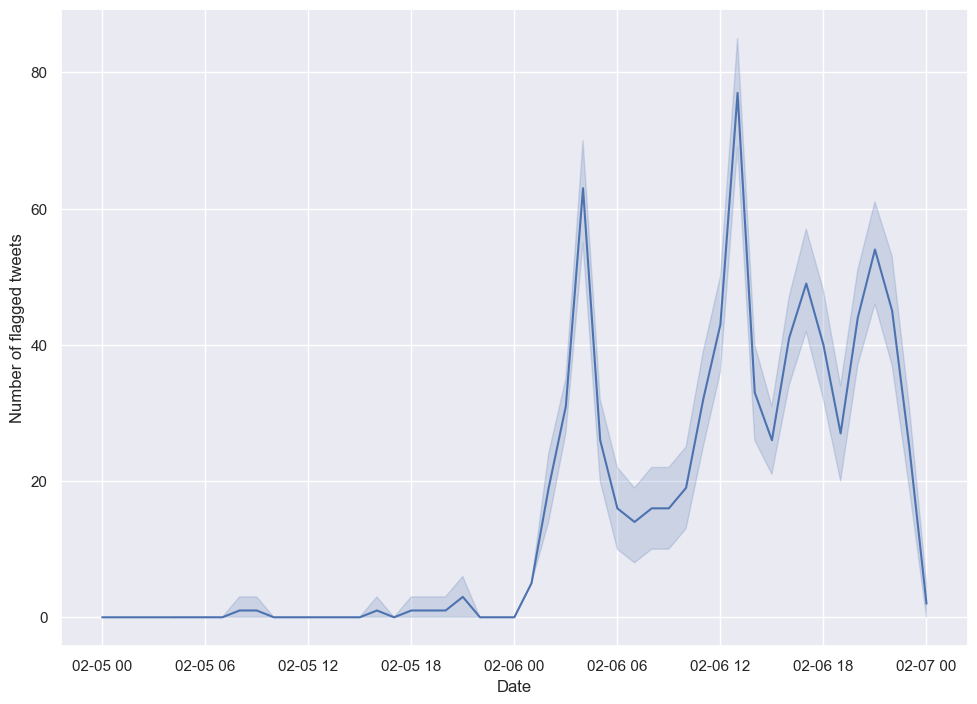

In [90]:
# Plot the predictions over time by hour
df['date'] = pd.to_datetime(df['date'])
df['date_hour'] = df['date'].dt.round('H')

# Plot a smooth line of the sum of positive predictions with seaborn
sns.lineplot(x='date_hour', y='prediction', data=df, estimator=sum)


# Axis labels
plt.xlabel('Date')
plt.ylabel('Number of flagged tweets')
plt.show()


In [91]:
# Priority tweets with predict proba
df['prediction_proba'] = model.predict_proba(X)[:,1]
# Priority are those above 0.9

df['priority'] = df['prediction_proba'].apply(lambda x: 1 if x > 0.9 else 0)

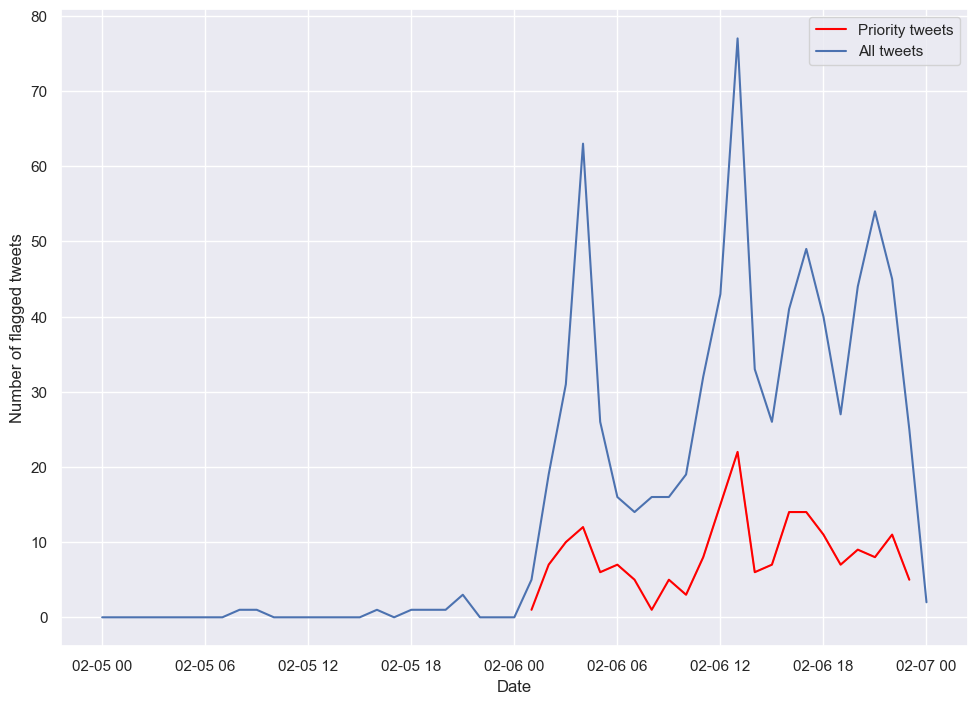

In [92]:
# Plot the same seaborn but with priority tweets 
sns.lineplot(x='date_hour', y='priority', data=df[df['priority'] == 1], estimator=sum, color='red', label='Priority tweets')
sns.lineplot(x='date_hour', y='prediction', data=df, estimator=sum, errorbar=None, label='All tweets')
plt.legend()

# Axis labels
plt.xlabel('Date')
plt.ylabel('Number of flagged tweets')

plt.show()

In [93]:
# Show the earliest 5 priority tweets
df[df['priority'] == 1].sort_values('date').head()

,date,text,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,url_count,hashtag_count,mention_count,prediction,date_hour,prediction_proba,priority
1171,2023-02-06 01:18:56+00:00,❗ deprem uyarisi / earthquake warning for turk...,29,28,6,5.482759,187,12,0,2,0,1,2023-02-06 01:00:00+00:00,0.916574,1
1159,2023-02-06 01:46:04+00:00,"usgs reports a m6.7 earthquake, central turkey...",26,25,5,7.076923,209,20,0,1,1,1,2023-02-06 02:00:00+00:00,0.930768,1
1154,2023-02-06 01:57:45+00:00,#earthquake 28 km nw of #doğanca (#turkey) 40 ...,33,33,3,7.303030,273,29,1,3,0,1,2023-02-06 02:00:00+00:00,0.927528,1
1148,2023-02-06 02:04:37+00:00,🚨#breaking: powerful 7.8 magnitude earthquake ...,38,33,8,6.736842,295,11,1,3,0,1,2023-02-06 02:00:00+00:00,0.965471,1
1145,2023-02-06 02:15:44+00:00,🔔#earthquake (#deprem) m6.4 occurred 15 km n o...,23,23,2,8.695652,222,33,1,4,0,1,2023-02-06 02:00:00+00:00,0.906952,1
